# Augmenting a dataset for instance segmentation

Data augmentation using CLODSA for instance segmentation with COCO format (http://cocodataset.org/#home). 

In [0]:
# Clone shellfish_detection repo
import os

%cd /content
repo_url = 'https://github.com/bowenwinnie/shellfish_detection'
repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

## Augmentation techniques
The augmentation techniques applied are:
- Rotation 90, 180, 270.
- Flip harizonal.

## Installing libraries

In [0]:
!pip install clodsa

## Loading the necessary libraries

Loading the necessary libraries to apply the data augmentation techniques in CLODSA.

In [0]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import cv2
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


# Create output folder to store result

In [0]:
%cd /content
!mkdir 'aug_train/'

/content


## Creating the augmentor object
Config parameters for the augmentation process, and use them to create an augmentor object.  

_The kind of problem_. In this case, we are working in an instance segmentation problem.

In [0]:
PROBLEM = "instance_segmentation"
# The annotation mode. The annotation is provided using the coco format in a file called annotations.json.
ANNOTATION_MODE = "coco"

# The input path contains the images.
INPUT_PATH = "/content/shellfish_detection/data/train_img"

# The generation mode. Linear means all the augmentation techniques are applied to all the images of the original dataset.
GENERATION_MODE = "linear"

# The output mode. The generated images will be stored in an output folder.  
OUTPUT_MODE = "coco"
OUTPUT_PATH= "aug_train/"


Using the above configuration to create the augmentor object. 

In [0]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

## Adding the augmentation techniques

Define image augmentation techniques and add them to the augmentor object.



In [0]:
# Define a transformer generator
transformer = transformerGenerator(PROBLEM)

In [0]:
# Rotations:
for angle in [0, 90, 180, 270]:
    rotate = createTechnique("rotate", {"angle" : angle})
    augmentor.addTransformer(transformer(rotate))

In [0]:
# horizontal Flip:
flip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(flip))

## Applying the augmentation process

Apply the augmentation process 

In [0]:
augmentor.applyAugmentation()

In [0]:
!ls aug_train/

0_c_0.jpg     1_c_100.jpg   2_c_101.jpg   3_c_102.jpg	4_c_103.jpg
0_c_100.jpg   1_c_101.jpg   2_c_102.jpg   3_c_103.jpg	4_c_104.jpg
0_c_101.jpg   1_c_102.jpg   2_c_103.jpg   3_c_104.jpg	4_c_105.jpg
0_c_102.jpg   1_c_103.jpg   2_c_104.jpg   3_c_105.jpg	4_c_106.jpg
0_c_103.jpg   1_c_104.jpg   2_c_105.jpg   3_c_106.jpg	4_c_107.jpg
0_c_104.jpg   1_c_105.jpg   2_c_106.jpg   3_c_107.jpg	4_c_108.jpg
0_c_105.jpg   1_c_106.jpg   2_c_107.jpg   3_c_108.jpg	4_c_109.jpg
0_c_106.jpg   1_c_107.jpg   2_c_108.jpg   3_c_109.jpg	4_c_10.jpg
0_c_107.jpg   1_c_108.jpg   2_c_109.jpg   3_c_10.jpg	4_c_110.jpg
0_c_108.jpg   1_c_109.jpg   2_c_10.jpg	  3_c_110.jpg	4_c_111.jpg
0_c_109.jpg   1_c_10.jpg    2_c_110.jpg   3_c_111.jpg	4_c_112.jpg
0_c_10.jpg    1_c_110.jpg   2_c_111.jpg   3_c_112.jpg	4_c_113.jpg
0_c_110.jpg   1_c_111.jpg   2_c_112.jpg   3_c_113.jpg	4_c_114.jpg
0_c_111.jpg   1_c_112.jpg   2_c_113.jpg   3_c_114.jpg	4_c_115.jpg
0_c_112.jpg   1_c_113.jpg   2_c_114.jpg   3_c_115.jpg	4_c_116.jpg
0_c_113.jpg  

visualize the results using some of the tools provided by [the COCO API](https://github.com/cocodataset/cocoapi).

In [0]:
!pip install pycocotools

In [0]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [0]:
image_directory = '/content/aug_train/'
annotation_file = '/content/aug_train/annotation.json'

In [0]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


In [0]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
cockle mussel tuatua

Custom COCO supercategories: 
cockle tuatua mussel


Visualize a random image of the output dataset

In [0]:
category_ids = example_coco.getCatIds(catNms=['cockle', 'mussel', 'tuatua'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [0]:
image_data

{'coco_url': '',
 'date_captured': '',
 'file_name': '3_com_1.jpg',
 'flickr_url': '',
 'height': 800,
 'id': 329,
 'license': 1,
 'width': 600}

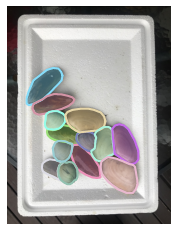

In [0]:
image = io.imread(image_directory + image_data['file_name'])
# image = io.imread(image_directory + '1_c_140.jpg')
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

Download the generated files. 

In [0]:
!zip -r aug_train.zip aug_train
# from google.colab import files
# files.download('/content/aug_train.zip')

  adding: aug_train/ (stored 0%)
  adding: aug_train/2_c_56.jpg (deflated 0%)
  adding: aug_train/1_m_26.jpg (deflated 0%)
  adding: aug_train/2_c_50.jpg (deflated 0%)
  adding: aug_train/1_t_74.jpg (deflated 0%)
  adding: aug_train/2_t_129.jpg (deflated 0%)
  adding: aug_train/3_c_121.jpg (deflated 1%)
  adding: aug_train/1_c_111.jpg (deflated 0%)
  adding: aug_train/2_c_77.jpg (deflated 0%)
  adding: aug_train/3_c_20.jpg (deflated 0%)
  adding: aug_train/0_t_68.jpg (deflated 0%)
  adding: aug_train/3_t_62.jpg (deflated 0%)
  adding: aug_train/1_t_136.jpg (deflated 0%)
  adding: aug_train/3_c_114.jpg (deflated 1%)
  adding: aug_train/0_t_83.jpg (deflated 0%)
  adding: aug_train/2_c_113.jpg (deflated 0%)
  adding: aug_train/3_com_13.jpg (deflated 0%)
  adding: aug_train/3_t_123.jpg (deflated 0%)
  adding: aug_train/0_t_103.jpg (deflated 0%)
  adding: aug_train/3_c_120.jpg (deflated 0%)
  adding: aug_train/2_c_120.jpg (deflated 0%)
  adding: aug_train/1_m_136.jpg (deflated 0%)
  adding: